In [229]:
# Install Python visualisation modules.
# @ Credit: https://stackoverflow.com/questions/51342408/how-do-i-install-python-packages-in-googles-colab
!pip install seaborn
!pip install pandas

In [230]:
# Importing relevant modules.
from numpy import full
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [231]:
### BOOK CHAPTERS
book_chapter_one = "/content/drive/MyDrive/Uni/DH/Muller1862_chapter1_book1.txt" # Acquires the content of the first ebook.
book_chapter_two = "/content/drive/MyDrive/Uni/DH/Sapir1921_chapter1_book2.txt" # Acquires the content of the second ebook.

### OTHER VARIABLES
stop_words_list = "/content/drive/MyDrive/Uni/DH/stopwordlist.txt" # Acquires the stop words.
headers = ['Word', 'Frequency', "Length", "Chapter"] # Creates the necessary  headers to be used in the CSV files.

In [233]:
#### Return the stop word list. #####
# @Credit: Previous coding assignments.
def create_stop_word_list_from_file(stop_word_list_file: str):
  file_contents = open_file_and_handle_encoding(stop_word_list_file, True, "utf-16") # Passing the arguments here directly, as the file is being used repeatedly.
  stop_words = [] # Create an empty list.
  stop_words = file_contents.split() # Split the text into words/list.
  return stop_words # Return the stop words.

#### Helper function for handling different encodings ####
# @Credit: Previous coding assignments.
def open_file_and_handle_encoding(file_path: str, encoding: bool, encoding_used: str):
  if encoding: # If the encoding boolean is set to true.
    with open(file_path, 'r', encoding=encoding_used) as file: # Handle different encodings if so required.
      contents = file.read() # Read the file.
  else: # If the encoding value is set to false.
    with open(file_path, 'r') as file: # Open the file.
      contents = file.read() # Read the file.
  return contents # Return the contents.

#### Helper function for converting all words to lowercase. ####
# @Credit: Previous coding assignments.
def convert_words_to_lowercase(file_contents: str, encoding: bool, encoding_used):
    contents = open_file_and_handle_encoding(file_contents, encoding, encoding_used) # Handle different file encodings.
    lower_case_words = contents.lower().split() # Turn the text to lowercase and then split it.
    return lower_case_words

#### Processing and cleaning the texts. ####
# @Credit: Previous coding assignments.
def process_text_for_frequency(text_content: str, stop_words_list, encoding: bool, encoding_used: str):
  cleaned_text_list = [] # Empty variable that is to be used later.
  lower_case_words_list = convert_words_to_lowercase(text_content, encoding, encoding_used) # Convert all words to lowercase.
  for word in lower_case_words_list: # Iterate through the lower case words list.
    if word not in stop_words_list: # Condition that checks if the items in the list are not part of the stop words list.
      cleaned_text_list.append(word) # Add item to the cleaned text list if not part of the stop words list.
  return cleaned_text_list # Returned the cleaned up list.

In [234]:
#### Helper function to get the word frequencies of the entire list. ####
# @Credit: Previous coding assignments.
def get_all_frequencies(cleaned_word_list):
  word_frequencies = {} # Creates an empty dictionary.
  for word in cleaned_word_list: # Iterate through the cleaned word list.
    # The following lines return the current count of the word or zero if it doesn’t exist. "+1" increases the count.
     word_frequencies[word] = word_frequencies.get(word, 0) + 1
  return word_frequencies # Return the word frequencies.

#### Helper function to store the data in a specific format ####
# @Credit: https://www.geeksforgeeks.org/python/python-ways-to-create-a-dictionary-of-lists/.
def store_frequency_based_data_dict(frequencies, book_chapter: str):
  rows = [] # Create an empty list.
  for word, frequency in frequencies: # Iterate through the dictionary, retrieving the word and frequency value.
   rows.append({  # For each iteration, create a dictionary entry, containing key-value pairs.
       "Word": word,
       "Frequency": frequency,
       "Length": len(word),
       "Chapter": book_chapter })
  return rows # Return the rows.

#### Calculate the top frequencies in a given list. #####
# @Credit: Previous coding assignments.
def get_top_ten_frequencies(cleaned_word_list, book_chapter: str):
  all_frequencies = get_all_frequencies(cleaned_word_list) # Make a call to the get_all_frequencies function.
  # x[1] sorts the second elements in the tuple, which are the count of frequencies each word has.
  sorted_frequencies = sorted(all_frequencies.items(), key=lambda x: x[1], reverse=True)
  return store_frequency_based_data_dict(sorted_frequencies[:10], book_chapter) # Return the top ten frequencies as processed rows.

#### Save the processed values into a CSV file. ####
# @Credit: https://realpython.com/python-csv/.
def save_values_to_csv_file(file_output: str, rows):
 with open(file_output, mode='w') as csv_file: # Open and write into a CSV file.
  writer = csv.DictWriter(csv_file, fieldnames=headers) # # Credit for the explanation: https://www.geeksforgeeks.org/python/python-write-dictionary-of-list-to-csv/.
  writer.writeheader() # Writes the file names as specified above in a single row.
  writer.writerows(rows) # Write the all the rows.

In [235]:
### Create the stop words.
stop_words = create_stop_word_list_from_file(stop_words_list) # Create the stop words list.

### Process the first chapter.
chapter_one = process_text_for_frequency(book_chapter_one, stop_words, True, "windows-1254") # Process the text for frequency.
chapter_one_rows = get_top_ten_frequencies(chapter_one, "1")
save_values_to_csv_file("Muller1862_chapter1_book1.csv",  chapter_one_rows)

# Process the second chapter.
chapter_two = process_text_for_frequency(book_chapter_two, stop_words_list, False, "")
chapter_two_rows = get_top_ten_frequencies(chapter_two, "2")
save_values_to_csv_file("Sapir1921_chapter1_book2.csv", chapter_two_rows)

# Merge the data and create a single CSV file.
rows = chapter_one_rows + chapter_two_rows
save_values_to_csv_file("word_frequencies.csv", rows)

In [236]:
# Create a data frame from a CSV.
# @Credit: https://www.geeksforgeeks.org/pandas/python-read-csv-using-pandas-read_csv/.
data_frame= pd.read_csv("/content/word_frequencies.csv")
data_frame.head(n=5) # Read the first five rows. @Credit: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html.

,Word,Frequency,Length,Chapter
0,science,42,7,1
1,language,30,8,1
2,human,18,5,1
3,history,16,7,1
4,man,16,3,1


<Axes: title={'center': 'Show How Length Corresponds to Frequency ♥'}, xlabel='Length', ylabel='Frequency'>

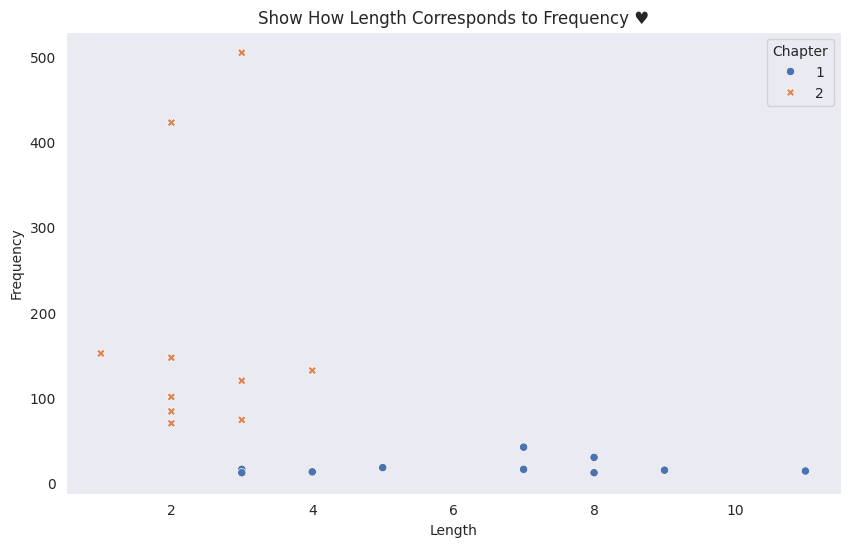

In [237]:
# Create the scatter plot visualisation.
# @Credit: https://www.geeksforgeeks.org/data-visualization/data-visualization-with-python-seaborn/ and:
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html for further adjustments.
sns.set_style("dark")
custom_colors = ['#FDB5CE', '#F5F2F2', '#85409D']
sns.set_palette(custom_colors)

plt.figure(figsize=(10, 6))
plt.title('Show How Length Corresponds to Frequency ♥')
sns.scatterplot(x="Length", y="Frequency", data=data_frame, hue="Chapter", style="Chapter", palette="deep", legend=full)

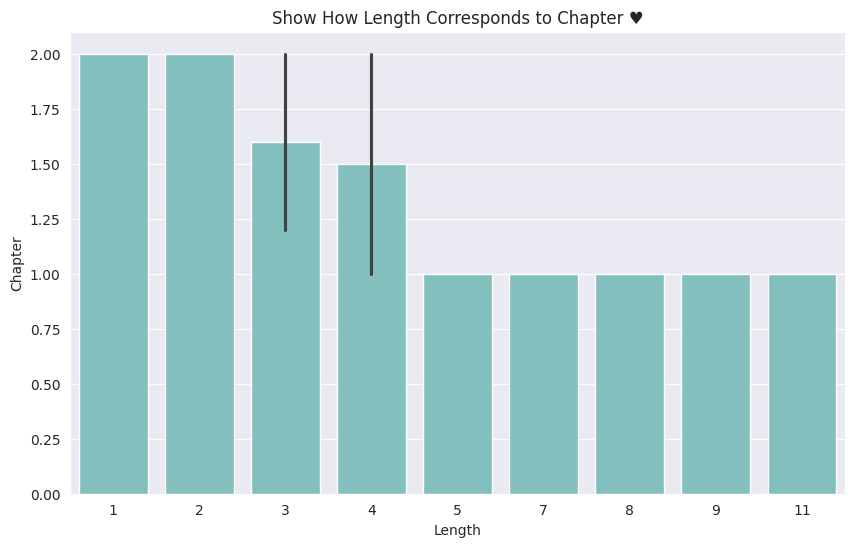

In [238]:
# Create the bar chart visualisation.
# @Credit: https://www.geeksforgeeks.org/data-visualization/data-visualization-with-python-seaborn/ and:
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html for further adjustments.
sns.set_style("darkgrid")
custom_colors = ['#79C9C5', '#F5F2F2', '#85409D']
sns.set_palette(custom_colors)
plt.figure(figsize=(10, 6))

sns.barplot(x='Length', y='Chapter', data=data_frame)
plt.title('Show How Length Corresponds to Chapter ♥')
plt.xlabel('Length')
plt.ylabel('Chapter')
plt.show()